In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 100

In [2]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "data_images/"

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)

# Load Data
train_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="training"
)

validation_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="validation"
)

Found 963 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


w pretrenowanym modelu musimy dopasować sobie ostatnią warstwę - żeby dopasować to do naszych danych, czyli określić liczbę klas 
niektóre mają info, jakie obrazki przyjmują (rozmiar) - niektóre przyjmują tylko określony rozmiar, niektóre mają określony maksymalny rozmiar obrazka 
po wczytaniu musimy pamiętać o ustawieniu input shape i liczby klas
chcemy, żeby wczytane warstwy i ich wagi nie były zmieniane 
uruchamiamy uczenie i ono się wtedy dzieje tylko na ostatniej warstwie

In [3]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,#usuwamy sobie ostatnią
                   input_shape=(64,64,3),#określamy jakie obrazki my wrzucamy
                   pooling='avg',classes=2,
                   weights='imagenet') #'imagenet'
for layer in pretrained_model.layers:
        layer.trainable=False # wyłączamy zmianę wag w warstwach

vgg_model.add(pretrained_model)

vgg_model.add(Flatten())
vgg_model.add(Dense(2, activation='softmax'))
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [4]:
vgg_model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])

history = vgg_model.fit(train_dataset, validation_data=validation_dataset, epochs=EPOCHS, callbacks = [es])

Epoch 1/100
31/31 [==============================] - 15s 482ms/step - loss: 0.7606 - accuracy: 0.4600 - val_loss: 0.7003 - val_accuracy: 0.5083
Epoch 2/100
31/31 [==============================] - 15s 491ms/step - loss: 0.6215 - accuracy: 0.6532 - val_loss: 0.6354 - val_accuracy: 0.6333
Epoch 3/100
31/31 [==============================] - 17s 540ms/step - loss: 0.5578 - accuracy: 0.7497 - val_loss: 0.5967 - val_accuracy: 0.6792
Epoch 4/100
31/31 [==============================] - 15s 475ms/step - loss: 0.5254 - accuracy: 0.7549 - val_loss: 0.5756 - val_accuracy: 0.7208
Epoch 5/100
31/31 [==============================] - 16s 528ms/step - loss: 0.5015 - accuracy: 0.7736 - val_loss: 0.5515 - val_accuracy: 0.7417
Epoch 6/100
31/31 [==============================] - 12s 392ms/step - loss: 0.4797 - accuracy: 0.7819 - val_loss: 0.5195 - val_accuracy: 0.7625
Epoch 7/100
31/31 [==============================] - 12s 372ms/step - loss: 0.4681 - accuracy: 0.7985 - val_loss: 0.5010 - val_accuracy:

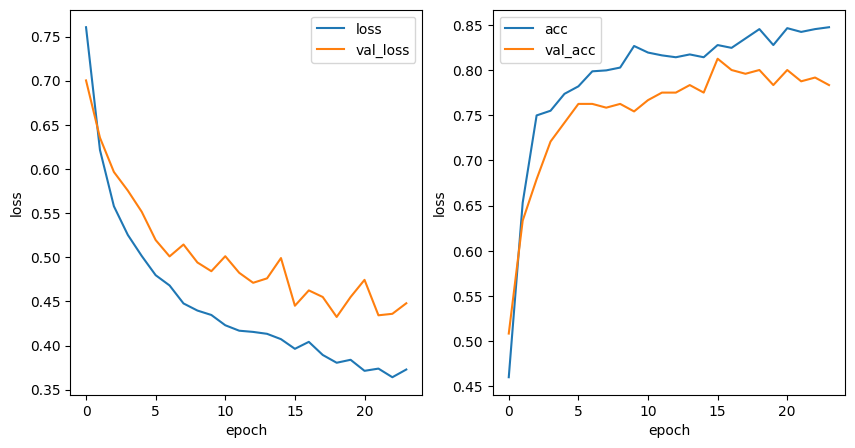

In [5]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [6]:
# Znajdz w internecie listę dostępnych modeli i sprawdź ich skuteczność

In [7]:
VGG19_model = Sequential()

pretrained_model= tf.keras.applications.VGG19(include_top=False,#usuwamy sobie ostatnią
                   input_shape=(64,64,3),#określamy jakie obrazki my wrzucamy
                   pooling='avg',classes=2,
                   weights='imagenet') #'imagenet'
for layer in pretrained_model.layers:
        layer.trainable=False # wyłączamy zmianę wag w warstwach

VGG19_model.add(pretrained_model)

VGG19_model.add(Flatten())
VGG19_model.add(Dense(2, activation='softmax'))
VGG19_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 20,025,410
Trainable params: 1,026
Non-trainable params: 20,024,384
_________________________________________________________________


In [8]:
###VGG19 

In [9]:
VGG19_model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])

history1 = VGG19_model.fit(train_dataset, validation_data=validation_dataset, epochs=EPOCHS, callbacks = [es])

Epoch 1/100
31/31 [==============================] - 16s 498ms/step - loss: 0.7258 - accuracy: 0.5805 - val_loss: 0.6110 - val_accuracy: 0.6958
Epoch 2/100
31/31 [==============================] - 15s 488ms/step - loss: 0.5781 - accuracy: 0.7394 - val_loss: 0.5869 - val_accuracy: 0.7333
Epoch 3/100
31/31 [==============================] - 15s 486ms/step - loss: 0.5503 - accuracy: 0.7456 - val_loss: 0.5820 - val_accuracy: 0.6917
Epoch 4/100
31/31 [==============================] - 15s 487ms/step - loss: 0.5108 - accuracy: 0.7632 - val_loss: 0.5709 - val_accuracy: 0.7125
Epoch 5/100
31/31 [==============================] - 15s 485ms/step - loss: 0.4955 - accuracy: 0.7757 - val_loss: 0.5579 - val_accuracy: 0.7208
Epoch 6/100
31/31 [==============================] - 15s 488ms/step - loss: 0.4977 - accuracy: 0.7664 - val_loss: 0.5387 - val_accuracy: 0.7750
Epoch 7/100
31/31 [==============================] - 15s 485ms/step - loss: 0.4792 - accuracy: 0.7892 - val_loss: 0.5569 - val_accuracy:

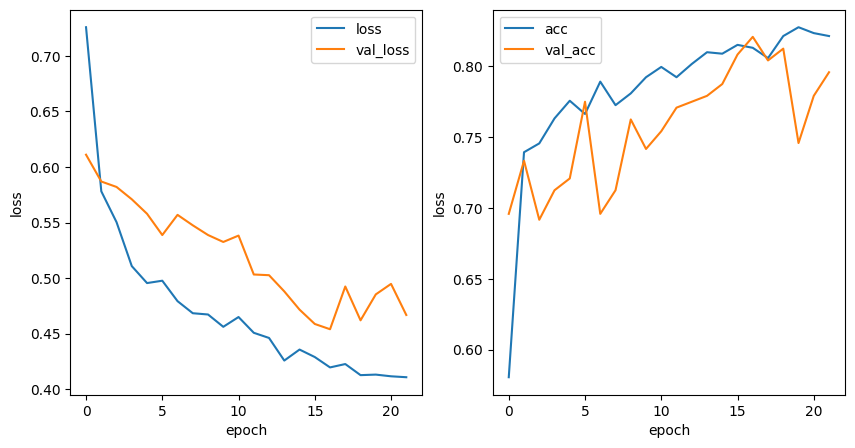

In [10]:
hist1 = pd.DataFrame(history1.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist1.loss, label = "loss")
plt.plot(hist1.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist1.accuracy, label = "acc")
plt.plot(hist1.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [15]:
res_model = Sequential()

pretrained_model= tf.keras.applications.ResNet101V2(include_top=False,#usuwamy sobie ostatnią
                   input_shape=(75,75,3),#określamy jakie obrazki my wrzucamy
                   pooling='avg',classes=2,
                   weights='imagenet') #'imagenet'
for layer in pretrained_model.layers:
        layer.trainable=False # wyłączamy zmianę wag w warstwach

res_model.add(pretrained_model)

res_model.add(Flatten())
res_model.add(Dense(2, activation='softmax'))
res_model.summary()

171317808/171317808 [==============================] - 16s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 2048)              42626560  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 42,630,658
Trainable params: 4,098
Non-trainable params: 42,626,560
_________________________________________________________________


In [16]:
res_model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])

history2 = res_model.fit(train_dataset, validation_data=validation_dataset, epochs=EPOCHS, callbacks = [es])

Epoch 1/100
31/31 [==============================] - 20s 426ms/step - loss: 0.8067 - accuracy: 0.6241 - val_loss: 0.7411 - val_accuracy: 0.6708
Epoch 2/100
31/31 [==============================] - 11s 364ms/step - loss: 0.5416 - accuracy: 0.7487 - val_loss: 0.5133 - val_accuracy: 0.7667
Epoch 3/100
31/31 [==============================] - 11s 364ms/step - loss: 0.4837 - accuracy: 0.7819 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 4/100
31/31 [==============================] - 11s 344ms/step - loss: 0.4529 - accuracy: 0.8037 - val_loss: 0.4446 - val_accuracy: 0.8000
Epoch 5/100
31/31 [==============================] - 11s 363ms/step - loss: 0.4319 - accuracy: 0.8152 - val_loss: 0.4619 - val_accuracy: 0.7958
Epoch 6/100
31/31 [==============================] - 11s 361ms/step - loss: 0.4079 - accuracy: 0.8307 - val_loss: 0.4020 - val_accuracy: 0.8417
Epoch 7/100
31/31 [==============================] - 11s 344ms/step - loss: 0.3650 - accuracy: 0.8640 - val_loss: 0.4771 - val_accuracy:

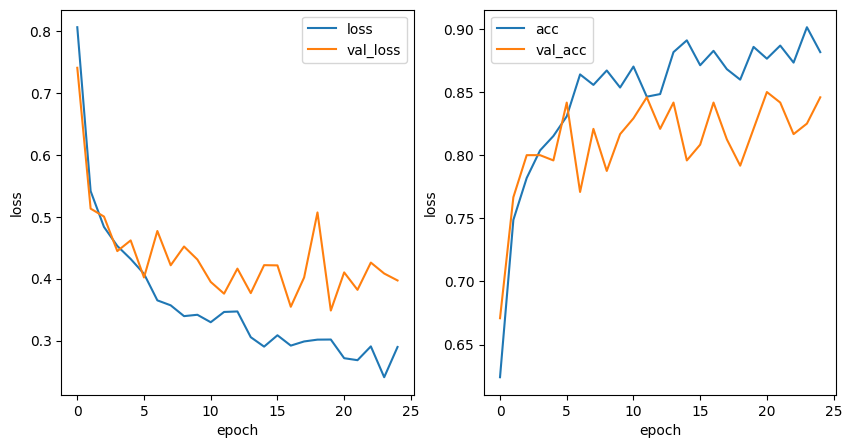

In [17]:
hist2 = pd.DataFrame(history2.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist2.loss, label = "loss")
plt.plot(hist2.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist2.accuracy, label = "acc")
plt.plot(hist2.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

te są troche gorsze niż te robione przez nas wcześniej, why?
- trzeba by je dotrenować na naszych danych
- warstwy ukryte się nie trenują - można by dotrenować je też
- nie każdy problem wymaga używania tak skomplikowanych sieci